In [100]:
from urllib. request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd
import matplotlib.pyplot as plt

# Read url & build up a news table

In [101]:
req = Request(url='https://finviz.com/quote.ashx?t=AAPL', headers={'user-agent': 'my-app'})
response = urlopen(req)
print(response)

In [110]:
#use beautifulsoup to process data
finviz_url = 'https://finviz.com/quote.ashx?t=' 
tickers = ['AAPL'] #['AAPL','TSLA','KO']

news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req) # open a url link and request results
    
    html = BeautifulSoup(response, features='html.parser') #get data from html
    news_table = html.find(id= 'news-table')
    news_tables[ticker] = news_table
news_tables

{'AAPL': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" width="130">Oct-28-22 10:06AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.wsj.com/articles/tech-boom-ends-as-companies-from-amazon-to-meta-adjust-to-turbulent-times-11666957789?siteid=yhoof2" onclick="trackAndOpenNews(event, 'The Wall Street Journal', 'https://www.wsj.com/articles/tech-boom-ends-as-companies-from-amazon-to-meta-adjust-to-turbulent-times-11666957789?siteid=yhoof2');" target="_blank">Tech Boom Ends as Companies From Amazon to Meta Adjust to Turbulent Times</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> The Wall Street Journal</span></div></div></td></tr>
 <tr><td align="right" width="130">10:05AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.i

# Transfor data in to list [ticker, date, time, news]

In [105]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        if row.a is not None:
            title = row.a.text
            date_data = row.td.text.split(' ')

            if len(date_data) == 1:
                time = date_data[0]
            
            else:
                date = date_data[0]
                time = date_data[1]
            
            parsed_data.append([ticker, date, time, title])
parsed_data[0]

['AAPL',
 'Oct-28-22',
 '10:05AM',
 'Dow Jones Rallies On Key Inflation Data; Amazon Dives, Apple Climbs On Earnings']

# Analyze the news to score

<Figure size 720x576 with 0 Axes>

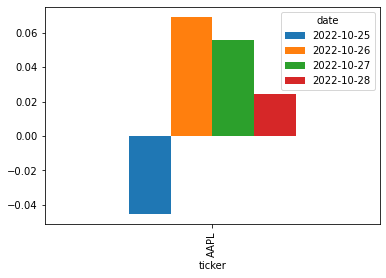

In [104]:
# Gather data into Dataframe
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date 


plt. figure(figsize=(10,8))
mean_df = df.groupby( ['ticker', 'date' ]).mean().unstack() 
mean_df = mean_df.xs( 'compound', axis="columns")
mean_df.plot(kind= 'bar')

plt.show()